### Instruction
This tutorial explain how to build specific surfaces on the example of (111) surface in FCC copper.
1. Read initial structure
2. Choose new vectors to make required surface normal to one of the vectors
3. Build supercell
4. Build slab with surface
5. Scale slab

### Import libraries

In [19]:
import sys
from IPython.display import Image

from siman import header
from siman.calc_manage import smart_structure_read
from siman.geo import create_supercell, create_surface2, supercell
%matplotlib inline

### 1. Read structure

In [4]:
st = smart_structure_read('Cu/POSCARCU.vasp') # read required structure

### 2. Choose new vectors 
The initial structure is FCC lattice in conventianal setting i.e. cubic unit cell.
As a first step we create orthogonal supercell with {111}cub surface on one side. 
Below the directions orthogonal to {111} are shown.
We will choose [-1-1-1], [01-1] and [2-1-1].

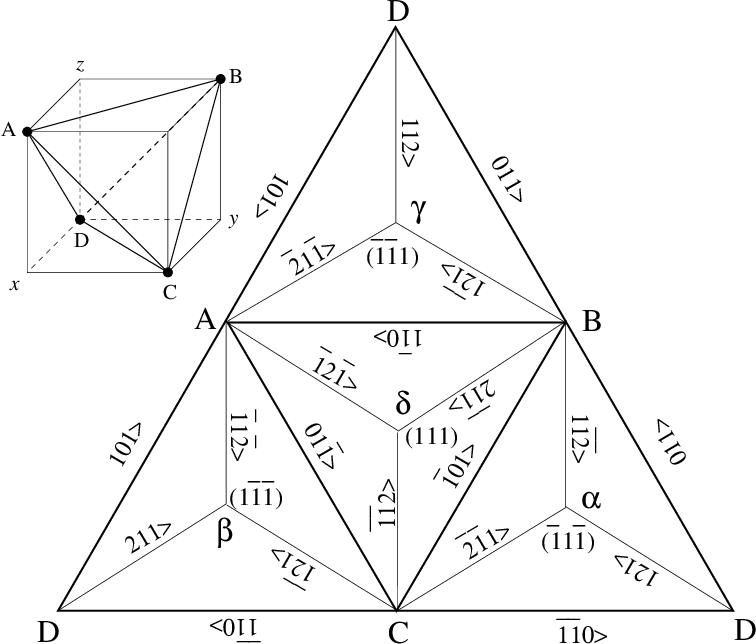

In [7]:
Image(filename='figs/Thompson-tetrahedron-notation-for-FCC-slip-systems.png')

### 3. Build supercell with new vectors

In [10]:
# create supercell using chosen directions, the *mul* allows to choose one half of the third vector
sc = create_supercell(st, [ [-1,-1,-1], [0,1,-1], [2,-1,-1]], mul = (1,1,0.5)) 

Old vectors (rprimd):
 [[3.6 0.  0. ]
 [0.  3.6 0. ]
 [0.  0.  3.6]] 
New vectors (rprimd) of supercell:
 [[-3.6 -3.6 -3.6]
 [ 0.   3.6 -3.6]
 [ 3.6 -1.8 -1.8]] 
The supercell should contain 12.0 atoms ... 
  -- OK 



### 4. Build slab
Now we need to create vacuum and rotate the cell. This can be done using *create_surface2* function

In [18]:
# here we choose [100] normal in supercell, which is equivalent to [111]cub
# combinations of *min_slab_size* and *cut_thickness* (small cut of slab from one side) allows create symmetrical slab
st_suf = create_surface2(sc, [1, 0, 0], min_vacuum_size = 10, 
    min_slab_size = 16, cut_thickness = 3, oxidation = {'Cu':'Cu0+' },  return_one = 1, surface_i = 0)

-- 1 surfaces were generated, choose required surface using *surface_i* argument 

surface position  0.5666666666666667
-- POSCAR was written to /home/aksenov/Simulation_wrapper/siman/tutorials/xyz/POSCAR_CU_vasp_supercell_from_pmg_delcutted 

Final structure contains  28 atoms


### 5. Scale slab 
Above the slab with minimum surface area was obtained. If you need larger surface you can use *supercell()* function for which you need to provide required sizes in Angstrems 

In [20]:
st_sufsc112 = supercell(st_suf, [10,10,32]) # make 2x2 slab

-- Calculating mul_matrix for ortho: [10, 10, 32] 

mul_matrix_float:
 [[ 1.95265238e+00  0.00000000e+00 -2.15902880e-17]
 [-3.14010452e-16  2.25472875e+00 -2.15902880e-17]
 [ 0.00000000e+00  0.00000000e+00  1.12830771e+00]] 
mul_matrix:
 [[2 0 0]
 [0 2 0]
 [0 0 1]] 
Old vectors (rprimd):
 [[ 5.1  0.   0. ]
 [ 0.   4.4  0. ]
 [ 0.   0.  28.4]] 
New vectors (rprimd) of supercell:
 [[10.2  0.   0. ]
 [ 0.   8.9  0. ]
 [ 0.   0.  28.4]] 
The supercell should contain 112.0 atoms ... 
  -- OK 



In [21]:
st_sufsc112.write_poscar() # save file as POSCAR for VASP

-- POSCAR was written to /home/aksenov/Simulation_wrapper/siman/tutorials/xyz/POSCAR_CU_vasp_supercell_from_pmg_delcutted_supercell 



'/home/aksenov/Simulation_wrapper/siman/tutorials/xyz/POSCAR_CU_vasp_supercell_from_pmg_delcutted_supercell'